# Chipotle **


### Step 1. Import the necessary libraries

In [38]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset of `chipotle` and assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4. Create a histogram of the top 5 items bought

In [8]:
top5 = chipo.groupby("item_name").agg({"quantity" : sum}).sort_values(by = "quantity", ascending = False)[:5]
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [23]:
x_axis = list(top5.index)
y_axis = [x[0] for x in top5.values]
y_axis.reverse()

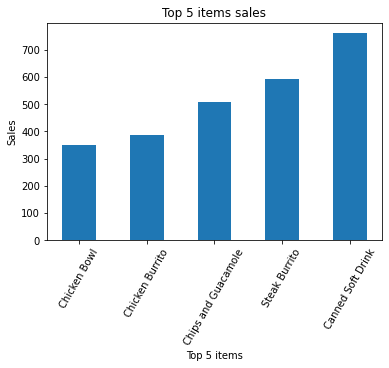

In [28]:
plt.bar(x_axis, y_axis, width = 0.5)

plt.xlabel("Top 5 items")
plt.ylabel("Sales")

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(60)

plt.title("Top 5 items sales")

plt.show()

### Step 5. Create a scatterplot with the number of items orderered per order price

Make sure you get the same labels and title
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
# Como item_price tiene un formato ****** pues toca hacerlo float

In [55]:
test = chipo["item_price"][0]
float(re.findall('[\d].[\d]*', test)[0])

2.39

In [63]:
for i in chipo["item_price"][:20]:
    ns = float(re.findall('[\d]+.[\d]+', i)[0])
    print(i, ":", ns)

$2.39  : 2.39
$3.39  : 3.39
$3.39  : 3.39
$2.39  : 2.39
$16.98  : 16.98
$10.98  : 10.98
$1.69  : 1.69
$11.75  : 11.75
$9.25  : 9.25
$9.25  : 9.25
$4.45  : 4.45
$8.75  : 8.75
$8.75  : 8.75
$11.25  : 11.25
$4.45  : 4.45
$2.39  : 2.39
$8.49  : 8.49
$8.49  : 8.49
$2.18  : 2.18
$8.75  : 8.75


In [64]:
chipo["formatted_price"] = chipo["item_price"].apply(lambda x: float(re.findall('[\d]+.[\d]+', x)[0]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,formatted_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [66]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   formatted_price     4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [69]:
orders = chipo.groupby("order_id").agg({"quantity" : sum, "formatted_price" : sum}).sort_values(by = "formatted_price", ascending = False)
orders.head()

,quantity,formatted_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [71]:
orders["formatted_price"]

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
17       10.08
889      10.08
1014     10.08
1303     10.08
1602     10.08
Name: formatted_price, Length: 1834, dtype: float64

Text(0.5, 1.0, 'Amount of items ordered per order price')

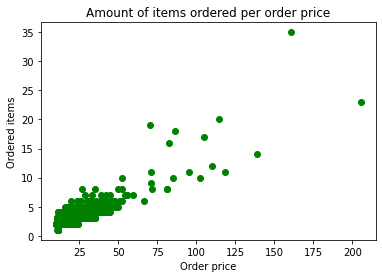

In [76]:
plt.scatter(orders["formatted_price"], orders["quantity"], c = "g")

plt.xlabel("Order price")
plt.ylabel("Ordered items")

plt.title("Amount of items ordered per order price")